<a href="https://colab.research.google.com/github/jalammar/jalammar.github.io/blob/master/notebookes/transformer/transformer_positional_encoding_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:

# Code from https://www.tensorflow.org/tutorials/text/transformer
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                            np.arange(d_model)[np.newaxis, :],
                            d_model)
  
    # Apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # Apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    # Limit to 0 and 2pi - No negative values.
    angles_2pi = np.mod(angle_rads, 2 * np.pi)

    pos_encoding = angles_2pi[np.newaxis, ...]

    return pos_encoding

def orthogonal(A):
    product = np.dot(A, A.T)
    np.fill_diagonal(product,0)
    return True if product.any() == 0 else False

def gram_schmidt(vectors):
    basis = []
    for v in vectors:
        w = v - sum(np.dot(v, b) * b for b in basis)
        if (w > 1e-10).any():  
            basis.append(w / np.linalg.norm(w))
    return np.array(basis)

def generate_visualization(A):
    plt.figure(figsize=(12,8))
    plt.pcolormesh(A[0], cmap='viridis')
    plt.xlabel('Embedding Dimensions')
    plt.xlim((0, dimensions))
    plt.ylim((tokens,0))
    plt.ylabel('Token Position')
    plt.colorbar()
    plt.show()


pos_encoding shape: (1, 10, 256)


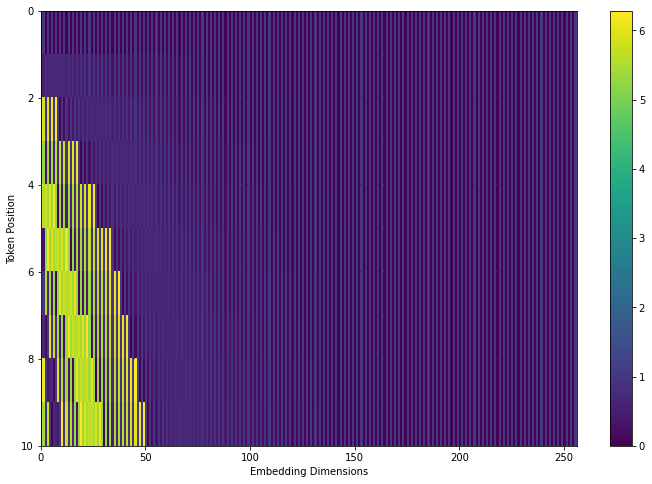

0 Orthogonal: False
1 Orthogonal: False
2 Orthogonal: False
3 Orthogonal: False
4 Orthogonal: False
5 Orthogonal: False
6 Orthogonal: False
7 Orthogonal: False
8 Orthogonal: False
9 Orthogonal: True

gs_tensor shape: (1, 10, 256) 



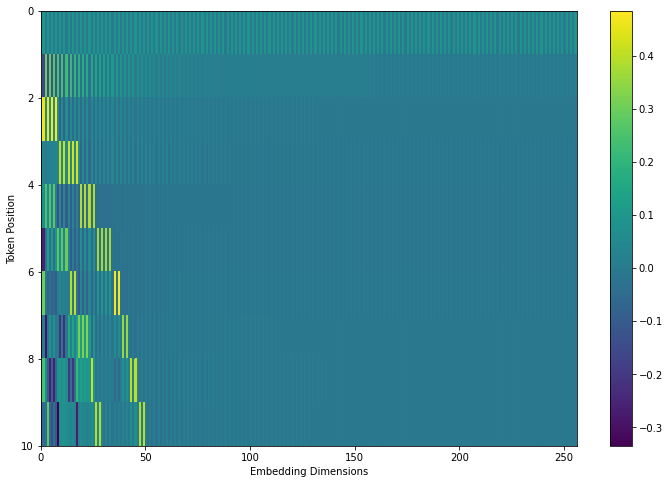

In [26]:
tokens = 10
dimensions = 256  # 16x16

pos_encoding = positional_encoding(tokens, dimensions)
print('\npos_encoding shape:', pos_encoding.shape)
generate_visualization(pos_encoding)

is_orthogonal = False
gs_tensor = []

for i in range(len(pos_encoding[0, :, :])):
    current_pos_encoding = pos_encoding[0, i:, :]
    is_orthogonal = orthogonal(current_pos_encoding)
    print(i, 'Orthogonal:', is_orthogonal)

    if (is_orthogonal == True):
        gs_tensor.append(current_pos_encoding)
    else:
        gs_tensor.append(gram_schmidt(current_pos_encoding))

gs_tensor = np.array(gs_tensor)
gs_tensor = gs_tensor[0]

gs_tensor = gs_tensor.reshape(1, gs_tensor.shape[0], gs_tensor.shape[1])
print('\ngs_tensor shape:', gs_tensor.shape, '\n')

generate_visualization(gs_tensor)